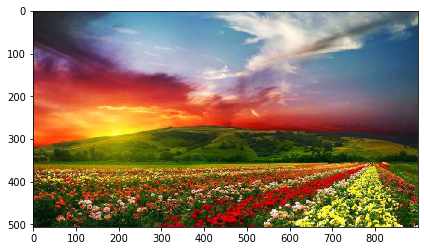

In [1]:
# Importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sn
from math import sqrt, floor
from skimage import io

#  read and show original image
image = io.imread('landscape.jpg')
io.imshow(image)
io.show()
 
rows, cols = image.shape[0],image.shape[1]
image = image.reshape(rows*cols,3)

In [2]:
def naive_sharding(ds, k, n, m):
    
    centroids = np.mat(np.zeros((k,n)))

    # Sum all elements of each row, add as col to original dataset, sort
    composite = np.mat(np.sum(ds, axis=1))
    ds = np.append(composite.T, ds, axis=1)
    ds.sort(axis=0)

    # Step value for dataset sharding
    step = floor(m/k)

    # Vectorize mean ufunc for numpy array
    vfunc = np.vectorize(_get_mean)

    # Divide matrix rows equally by k-1 (so that there are k matrix shards)
    # Sum columns of shards, get means; these columnar means are centroids
    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(ds[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(ds[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

def _get_mean(sums, step):
    return sums/step

def Cost(centroids, C, data):
    cost = 0
    m, n = data.shape
    for i in range(m):
        cost = np.sum(np.power(np.subtract(centroids[C[i,0],:], data[i,:]), 2))
    return cost

def CL(Train_Data, centroids):
    m, n = Train_Data.shape
    Distances = np.array([]).reshape(m,0)
    for i in range(k):
        tempDist = np.sum(np.power(np.subtract(Train_Data, centroids[i,:]), 2), axis = 1)
        Distances = np.c_[Distances, tempDist]
    C = np.argmin(Distances, axis = 1)
    C.astype(int)
    return C

In [7]:
N = 10
m, n = image.shape
K = np.arange(25,35)
cost_arr = np.zeros((len(K),N+1))
k_err = np.zeros(len(K))

for t in range(len(K)):
    k = K[t]
    ds = np.copy(image)
    centroids = naive_sharding(ds, k, n, m)
    C = CL(image, centroids)
    cost_arr[t][0] = Cost(centroids, C, image)
    for itera in range(N):
        clusters = [[] for i in range(k)]
        nums = np.zeros(k)
        for i in range(m):
            clusters[C[i,0]].append(i)
            nums[C[i,0]] += 1
        for i in range(k):
            s = np.zeros((1, n))
            for j in range(len(clusters[i])):
                s += image[clusters[i][j],:]
            centroids[i,:] = s/nums[i]
        C = CL(image, centroids)
        cost_arr[t][itera + 1] = Cost(centroids, C, image)
    k_err[t] = cost_arr[t][N-1]

[1588.9754868  1230.80821628 1222.21501683 1489.04795138 1279.42644009
 1168.63015599 1225.52353966 1227.15571883 1322.25076414 1384.79895713]


Text(0, 0.5, 'cost')

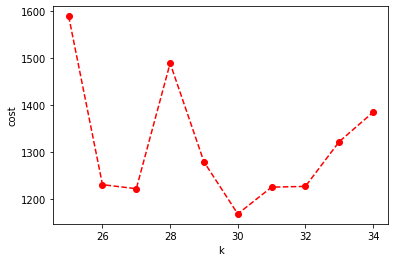

In [8]:
print(k_err)
plt.plot(K, k_err,'--ro')
plt.xlabel('k')
plt.ylabel('cost')

In [5]:
#choosing k using above figure
N = 10
m, n = image.shape
k = 30
ds = np.copy(image)
centroids = naive_sharding(ds, k, n, m)
C = CL(image, centroids)
for itera in range(N):
    clusters = [[] for i in range(k)]
    nums = np.zeros(k)
    for i in range(m):
        clusters[C[i,0]].append(i)
        nums[C[i,0]] += 1
    for i in range(k):
        s = np.zeros((1, n))
        for j in range(len(clusters[i])):
            s += image[clusters[i][j],:]
        centroids[i,:] = s/nums[i]
    C = CL(image, centroids)

In [6]:
centroids

matrix([[  8.2682102 ,  30.6187565 ,   6.28889178],
        [ 22.80749895,  41.15284178,  12.72538752],
        [ 32.62625216,  58.01043178,   7.19433506],
        [ 73.30811936,  33.76173953,  11.92354846],
        [ 42.60690173,  55.40043344,  24.59373177],
        [ 48.132446  ,  40.21361554,  48.49465416],
        [ 55.11804429,  75.4707301 ,  12.10953738],
        [ 78.27475396,  97.5318906 ,  17.71404491],
        [ 95.73145865,  74.56120477,  20.44279336],
        [128.71519266,  34.64077242,  13.87232166],
        [123.92577382, 111.02689572,  25.9480617 ],
        [ 87.00979021,  57.36377622,  79.83195804],
        [ 60.77522952,  94.11765977, 123.17270927],
        [124.1720718 ,  92.34820986, 110.11633442],
        [154.10288749,  50.52942803,  55.98843899],
        [188.11229089,  20.84353401,  12.16758489],
        [208.70149316,  69.02432682,  46.26025501],
        [242.74793456, 114.77824588,  46.81452098],
        [169.96647973, 146.07484046,  26.29794366],
        [187

In [15]:
#Image Compression
Img_comp = image.copy()
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        Img_comp[clusters[i][j]] = centroids[i]

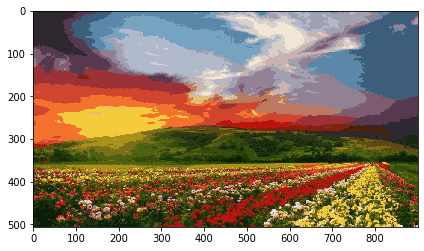

In [30]:
Img_comp = Img_comp.reshape((rows,cols,3))
Img_comp.astype(np.uint8)
io.imsave('compressed_image.jpg',Img_comp)
io.imshow(Img_comp)
io.show()